# ИДЗ №3. Демков Михаил Кириллович БПИ212. 

## Описание задания

**Исследование алгоритмов поиска кратчайшего пути в неориентированном графе трех типов:**

* **Полный граф**
* **Связный граф с коэффициентом плотности 0.4-0.5 (был выбран 0.4)**
* **Разреженный граф**

Размеры графов от 10 до 1010 вершин с шагом 50.

## Проведенная работа

Работа выполнена на 10 баллов с использованием следующих алгоритмов:

* **Алгоритм Дейкстры**
* **Алгоритм Беллмана-Форда**
* **Алгоритм Флойда-Уоршелла**
* **Алгоритм A\* (как дополнительный)**

Каждый алгоритм был прогнан по 5 раз, время работы усреднено. Результаты в табличном виде
представлены в файле **_time_edges_vertexes.csv_**, находящемся в папке **tables**.

Построенные графики и их анализ находятся в файлах **_report.ipynb / report.pdf_** (находятся в
папке
**scripts** и **корне проекта** соответственно).

## Примечания

В качестве начальной точки выбрана вершина 0, в качестве конечной верешина n / 2, где n - размер
графа.

# Общие графики зависимости времени работы от числа вершин и числа ребер

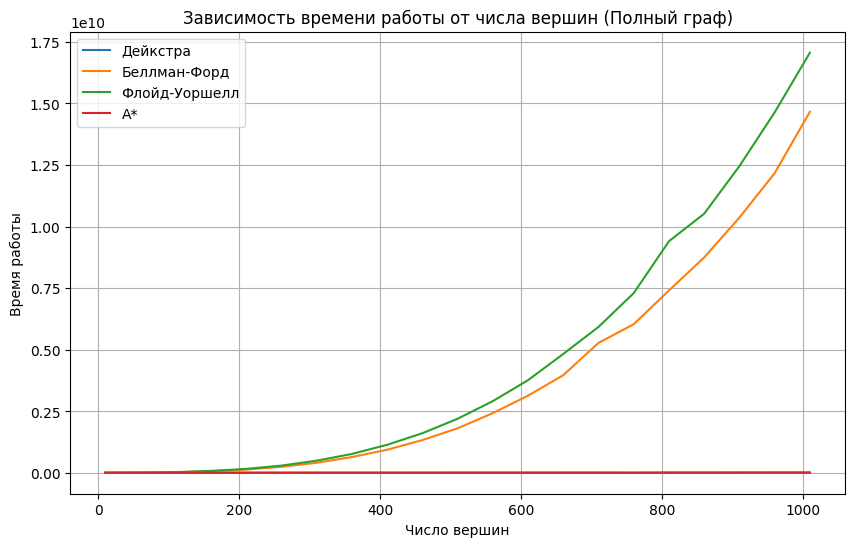

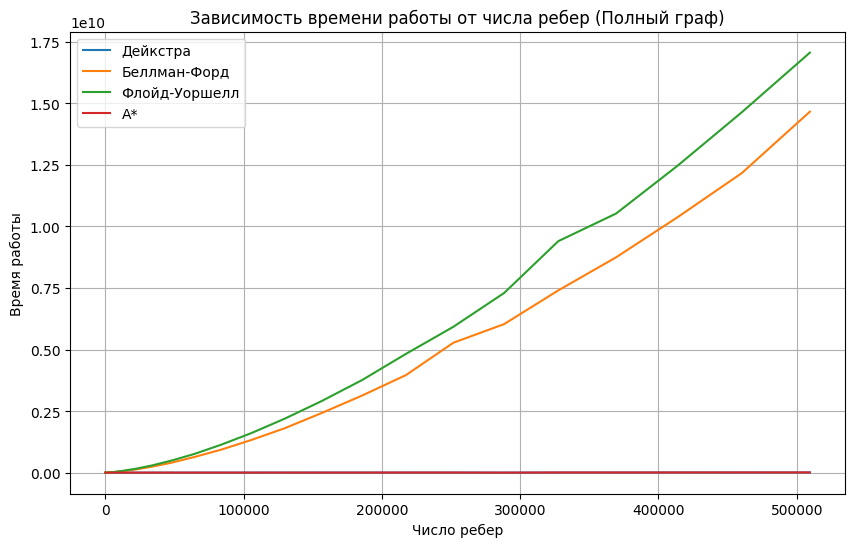

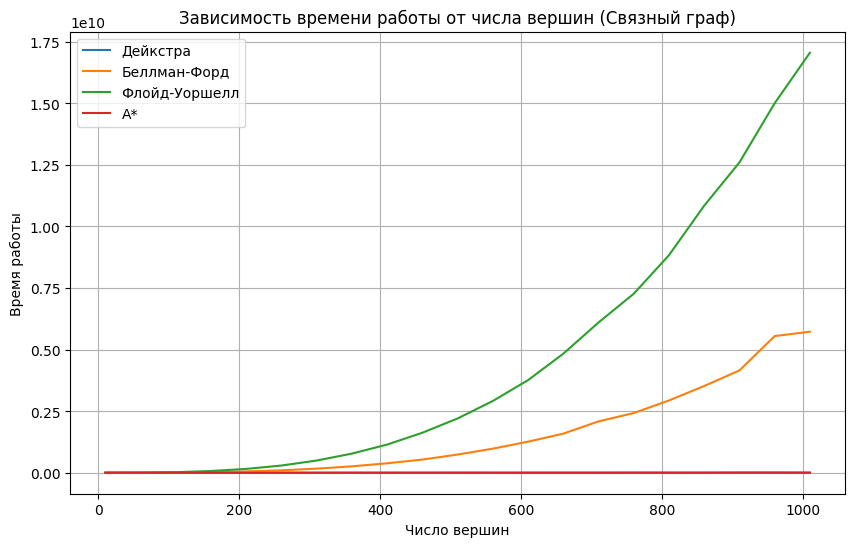

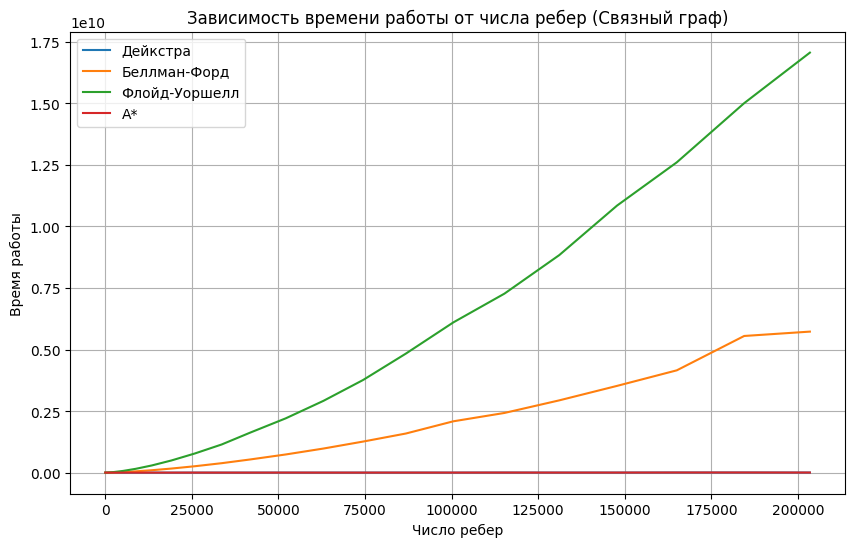

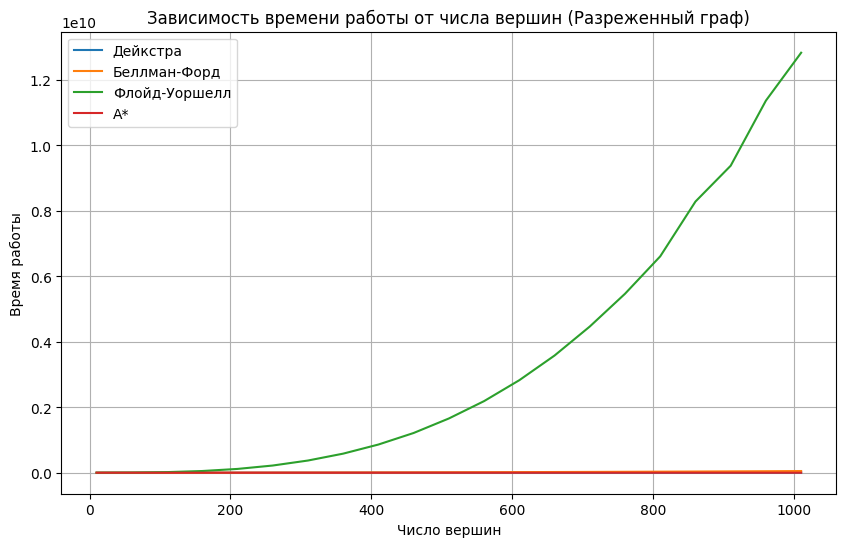

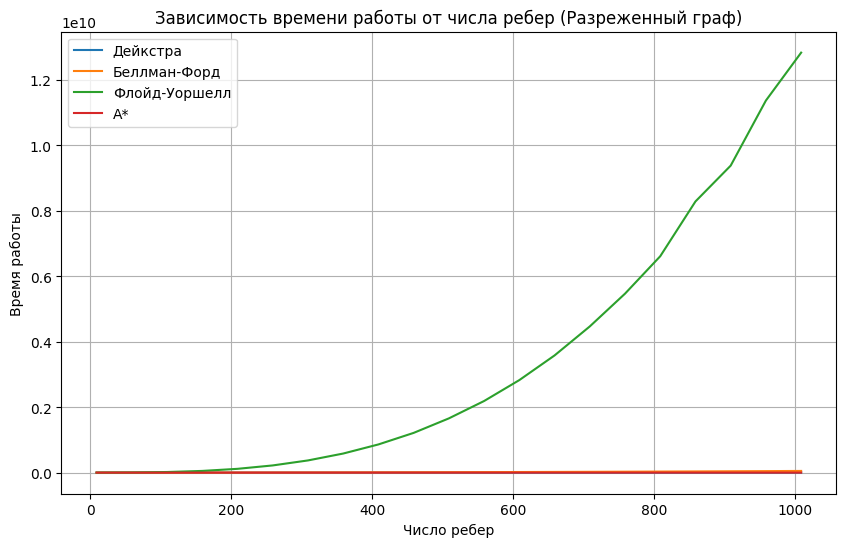

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из файла CSV
data = pd.read_csv('../tables/time_edges_vertexes.csv', delimiter=';')

# Уникальные значения столбца "Graph_type"
graph_types = data['Graph_type'].unique()

# Построение графиков для каждого типа графа
for graph_type in graph_types:
    graph_type_data = data[data['Graph_type'] == graph_type]

    # График зависимости времени работы от числа вершин для каждого алгоритма
    plt.figure(figsize=(10, 6))
    algorithms = graph_type_data['Algorithm'].unique()
    for algorithm in algorithms:
        algorithm_data = graph_type_data[graph_type_data['Algorithm'] == algorithm]
        plt.plot(algorithm_data['Vertexes'], algorithm_data['Time'], label=algorithm)

    plt.xlabel('Число вершин')
    plt.ylabel('Время работы')
    plt.title(f'Зависимость времени работы от числа вершин ({graph_type} граф)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # График зависимости времени работы от числа ребер для каждого алгоритма
    plt.figure(figsize=(10, 6))
    for algorithm in algorithms:
        algorithm_data = graph_type_data[graph_type_data['Algorithm'] == algorithm]
        plt.plot(algorithm_data['Edges'], algorithm_data['Time'], label=algorithm)

    plt.xlabel('Число ребер')
    plt.ylabel('Время работы')
    plt.title(f'Зависимость времени работы от числа ребер ({graph_type} граф)')
    plt.legend()
    plt.grid(True)
    plt.show()



### Общая тенденция
Как можно заметить на агрегированных графиках выше, прослеживается некая общая тенденция, а именно - **алгоритм Флойда-Уоршелла работает значительно хуже всех остальных с примерной ассимптотикой O(N^3)**, где N - число вершин в графе. В сравнении графиков зависимостей от числа вершин и ребер можно сказать, что разницы в алгоритме Флойда-Уоршелла нет никакой, так как его сложность зависит непосредственно от числа вершин. Алгоритм Беллмана-Форда начинает работать значительно быстрее с уменьшением числа вершин.

### Алгоритм Дейкстры
Алгоритм Дейкстры имеет теоритическую ассимтотику **O((N + M)logN)**, где N - число вершин в графе, а M - число ребер. На всех типах графов он выглядит как обычная линия, а связано это с тем, что алгоритм Дейкстры работает последовательно и обрабатывает вершины в порядке возрастания их расстояний от исходной вершины. Это означает, что время работы алгоритма увеличивается по мере расширения области поиска и приближения к конечной вершине.

### Алгоритм Беллмана-Форда
Ассимптотика алгоритма Беллмана-Форда составляет **O(N*M)**, где N - число вершин, а M - число ребер. Очевидно, что в полном графе алгоритм показывает наихудшие результаты, так как число ребер близко к числу вершин и сложность почти вырастает в квадрат **O(N^2)**. На связном графе с коэффициентом плотности 0.4 алгоритм работает значительно быстрее - примерно в 3 раза. На разреженных графах алгоритм выравнялся к линии наравне с другими за исключением Флойда-Уоршелла. А связано это с тем, что в разреженном графе сравнительно мало ребер.

### Алгоритм Флойда-Уоршелла
Выводы по алгоритму Флойда-Уоршелла указаны в общей тенденции

### Алгоритм A*
Теоритеческая ассимптотика алгоритма A* - **O((N + M)logN)**, где где N - число вершин в графе, а M - число ребер. Но его эффективность также зависит от выбранной эвристической функции. Если эвристическая функция является допустимой, то есть она никогда не переоценивает расстояние до цели, то алгоритм A* будет гарантированно находить оптимальный путь. В таком случае, количество вершин, посещенных алгоритмом, будет значительно меньше, что сокращает время работы. В моем случае хорошо выбранная эвристическая функция не ухудшает базовую ассимптотику, так что алгоритм хорошо себя показывает


# Частные графики зависимости времени работы от числа вершин и ребер
## Алгоритм Дейкстры

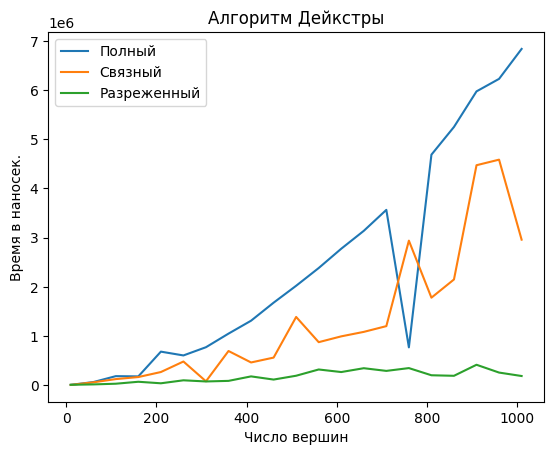

In [16]:
dijkstra = data[(data['Algorithm'] == 'Дейкстра')]

graph_types = dijkstra['Graph_type'].unique()

for type in graph_types:
    rows = dijkstra[dijkstra['Graph_type'] == type]
    plt.plot(rows['Vertexes'], rows['Time'], label=type)

plt.legend()
plt.title('Алгоритм Дейкстры')
plt.xlabel('Число вершин')
plt.ylabel('Время в наносек.')
plt.show()

Как было сказано раннее, алгоритм имеет ассимптотику **O((N + M)logN)**, где N - число вершин в графе, а M - число ребер. Соответственно, зависимость от числа ребер и числа вершин. В случае с полным и связным графом время выполнения растет и это очевидно. На разреженных графах, где число ребер невелико алгоритм показывается себя лучше всего. Это будет видно на графике ниже

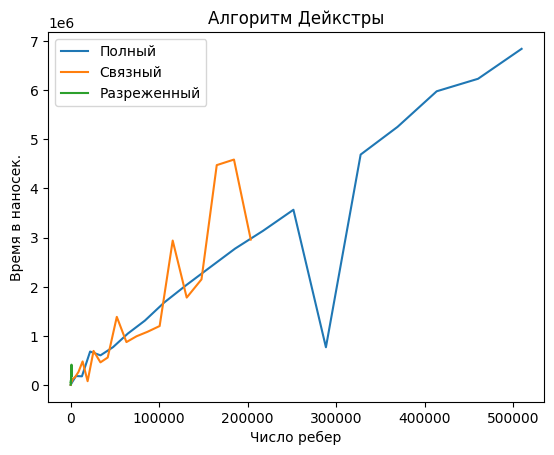

In [17]:
for type in graph_types:
    rows = dijkstra[dijkstra['Graph_type'] == type]
    plt.plot(rows['Edges'], rows['Time'], label=type)

plt.legend()
plt.title('Алгоритм Дейкстры')
plt.xlabel('Число ребер')
plt.ylabel('Время в наносек.')
plt.show()

Нагдяное представлени времени работы Дейкстры от числа ребер. Кривая разреженных графов выглядит странно из-за слишком большой разницы числа ребер между разреженным и другими графами. Выбросы связаны с несовершенностью вычислительных мощностей
## Алгоритм Беллмана-Форда

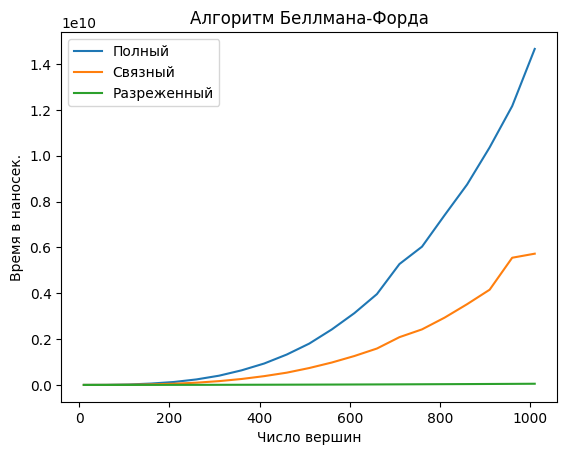

In [18]:
bellman_ford = data[(data['Algorithm'] == 'Беллман-Форд')]

graph_types = bellman_ford['Graph_type'].unique()

for type in graph_types:
    rows = bellman_ford[bellman_ford['Graph_type'] == type]
    plt.plot(rows['Vertexes'], rows['Time'], label=type)

plt.legend()
plt.title('Алгоритм Беллмана-Форда')
plt.xlabel('Число вершин')
plt.ylabel('Время в наносек.')
plt.show()

Ассимптотика алгоритма Беллмана-Форда составляет **O(N*M)**, где N - число вершин, а M - число ребер. Очевидно, что в полном графе алгоритм показывает наихудшие результаты, так как число ребер близко к числу вершин и сложность почти вырастает в квадрат **O(N^2)**. На связном графе все получше, а на разреженном совсем хорошо - кривая выглядит почти как идеальная линия. Посмотрим на кривые на графике от числа ребер

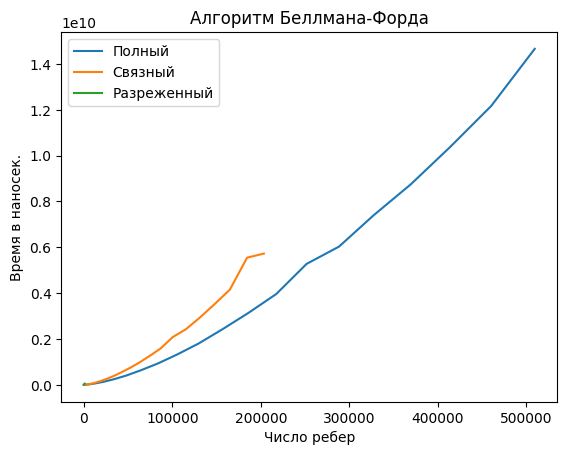

In [19]:
for type in graph_types:
    rows = bellman_ford[bellman_ford['Graph_type'] == type]
    plt.plot(rows['Edges'], rows['Time'], label=type)

plt.legend()
plt.title('Алгоритм Беллмана-Форда')
plt.xlabel('Число ребер')
plt.ylabel('Время в наносек.')
plt.show()

В начале связный граф показывает результаты хуже, чем полный. Связано это с погрешностями измерения. На разреженных графах, где число ребер невелико кривая выглядит очень хорошо.
## Алгоритм Флойда-Уоршелла

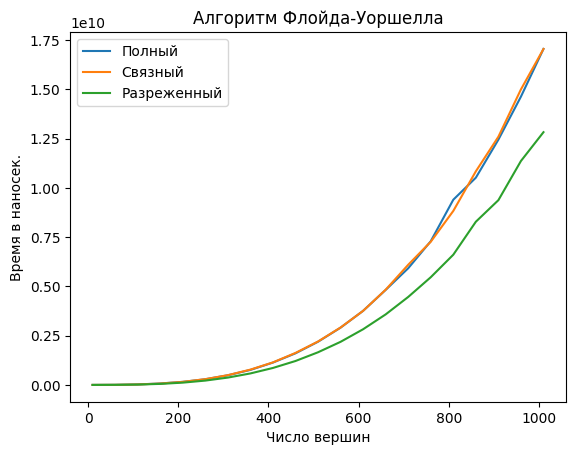

In [20]:
floyd_warshall = data[(data['Algorithm'] == 'Флойд-Уоршелл')]

graph_types = floyd_warshall['Graph_type'].unique()

for type in graph_types:
    rows = floyd_warshall[floyd_warshall['Graph_type'] == type]
    plt.plot(rows['Vertexes'], rows['Time'], label=type)

plt.legend()
plt.title('Алгоритм Флойда-Уоршелла')
plt.xlabel('Число вершин')
plt.ylabel('Время в наносек.')
plt.show()

Примерная ассимптотика алгоритма Флойда-Уоршелла - **O(N^3)**, а значит для этого алгоритма не важно сколько ребер в графе. Поэтому кривые показывают идентичную тенденцию. Посмотрим на кривые в оценке числа ребер

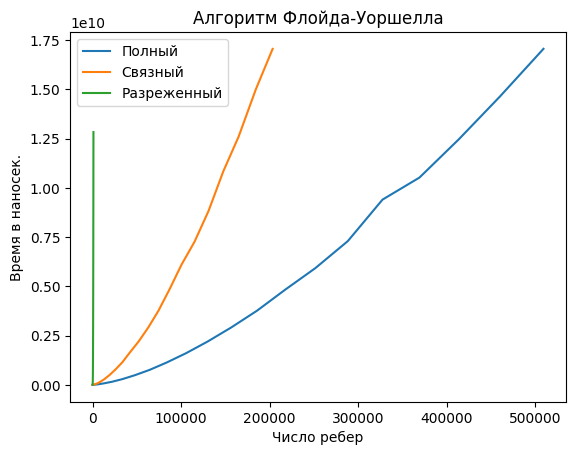

In [21]:
for type in graph_types:
    rows = floyd_warshall[floyd_warshall['Graph_type'] == type]
    plt.plot(rows['Edges'], rows['Time'], label=type)

plt.legend()
plt.title('Алгоритм Флойда-Уоршелла')
plt.xlabel('Число ребер')
plt.ylabel('Время в наносек.')
plt.show()

Кривые примерно равномерно растут с увеличением числа ребер (кроме разреженного графа, в нем число ребер на данном графике растет незаметно). Погрешности допустимы в связи с несовершенностью проводимых измерений.
## Алгоритм A*

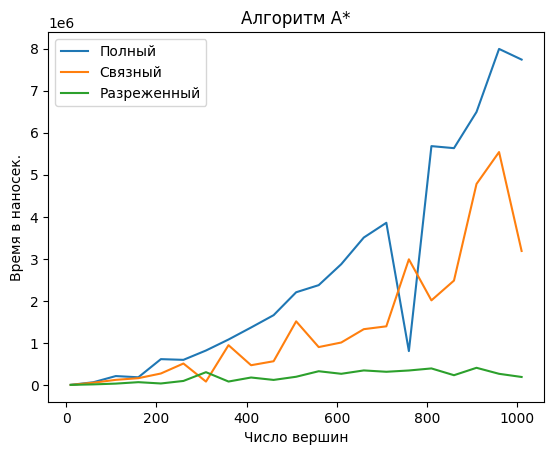

In [22]:
astar = data[(data['Algorithm'] == 'A*')]

graph_types = astar['Graph_type'].unique()

for type in graph_types:
    rows = astar[astar['Graph_type'] == type]
    plt.plot(rows['Vertexes'], rows['Time'], label=type)

plt.legend()
plt.title('Алгоритм A*')
plt.xlabel('Число вершин')
plt.ylabel('Время в наносек.')
plt.show()

Теоритеческая ассимптотика алгоритма A* - **O((N + M)logN)**, где где N - число вершин в графе, а M - число ребер. Но его эффективность также зависит от выбранной эвристической функции. В случае с полным графом, M близко к N, время работы планомерно увеличивается. Такая же тенденция на рост прослеживается и на связных графах. А вот на разреженных кривая выглядит гораздо лучше аналогов, так как число ребер невелико.

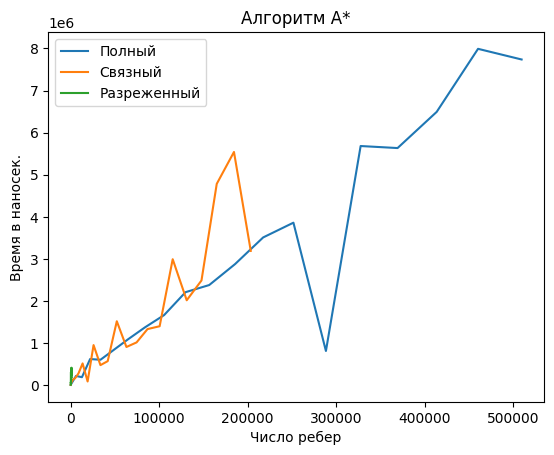

In [23]:
for type in graph_types:
    rows = astar[astar['Graph_type'] == type]
    plt.plot(rows['Edges'], rows['Time'], label=type)

plt.legend()
plt.title('Алгоритм A*')
plt.xlabel('Число ребер')
plt.ylabel('Время в наносек.')
plt.show()

Кривые выглядят как в фильме ужасов - ох уж эти несовершенные процессоры M1...Разреженный граф показывает тенденцию на рост времени с увеличением числа рабер, однако это незаметно, так как число ребер все еще достаточно мало по сравнению с другими типами графов

# Выводы
Проведя исследование, можно сделать следующие выводы - **если граф полный, связный или разреженный, то для поиска кратчайшего пути лучше всего использовать алгоритм Дейкстры или A*** (их ассимптотики примерно схожи). Но это работает в случае с графами без отрицательных весов. 
Самый неэффективный алгоритм - Флойда-Уоршелла, так как его ассимптотика **O(N^3)**, где N - число вершин, а значит этому алгоритму неважно сколько ребер в графе.
**Спасибо за внимание!**